Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Hypothesis Generation:The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store

In [1]:
#importing the necessary modules required to solve the problem
#Loading Packages and Data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Reading data from the csv

In [2]:
dataset=pd.read_csv("/content/Train.csv")
print(dataset)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [3]:
data=pd.read_csv("/content/Test.csv")
print(data)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198 

In [4]:
concting=pd.concat([data,dataset])
print(concting)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198 

In [5]:
#Exploratory Data Analysis
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


In [6]:
dataset.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks   141.9154  OUT035             2004.0                     Small        Tier 2                Supermarket Type1  992.7078             1
FDV35            19.500       Low Fat           0.128405         Breads        156.4314  OUT049             1999.0                     Medium       Tier 1                Supermarket Type1  2326.9710            1
FDV26            20.250       Regular           0.076097         Dairy         193.5794  OUT013             1987.0                     High         Tier 3                Supermarket Type1  1950.7940            1
                                                0.000000         Dairy         194.2794  OUT049             1999.0                     Medium       Tier 1   

In [7]:
dataset.shape

(8523, 12)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8516 non-null   object 
 1   Item_Weight                7054 non-null   float64
 2   Item_Fat_Content           8516 non-null   object 
 3   Item_Visibility            8516 non-null   float64
 4   Item_Type                  8516 non-null   object 
 5   Item_MRP                   8516 non-null   float64
 6   Outlet_Identifier          8516 non-null   object 
 7   Outlet_Establishment_Year  8516 non-null   float64
 8   Outlet_Size                6108 non-null   object 
 9   Outlet_Location_Type       8516 non-null   object 
 10  Outlet_Type                8516 non-null   object 
 11  Item_Outlet_Sales          8516 non-null   float64
dtypes: float64(5), object(7)
memory usage: 799.2+ KB


checking for missing values: 
let us check for null values in the given data

In [9]:
dataset.isnull().sum()

Item_Identifier                 7
Item_Weight                  1469
Item_Fat_Content                7
Item_Visibility                 7
Item_Type                       7
Item_MRP                        7
Outlet_Identifier               7
Outlet_Establishment_Year       7
Outlet_Size                  2415
Outlet_Location_Type            7
Outlet_Type                     7
Item_Outlet_Sales               7
dtype: int64

Here we can see that Item_weight has 1463 missing values and Outlet_Size  has 2410 missing values 
Now let us treat these missing values by using  mean and mode. 

Missing Value Treatment

In [10]:
dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean(),inplace=True)
dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0],inplace=True)

In [11]:
dataset.isnull().sum()

Item_Identifier              7
Item_Weight                  0
Item_Fat_Content             7
Item_Visibility              7
Item_Type                    7
Item_MRP                     7
Outlet_Identifier            7
Outlet_Establishment_Year    7
Outlet_Size                  0
Outlet_Location_Type         7
Outlet_Type                  7
Item_Outlet_Sales            7
dtype: int64

In [12]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8516.000000,8516.000000,8516.000000,8516.000000
mean,12.858545,0.066141,140.984479,1997.831141,2180.934462
std,4.226030,0.051616,62.299975,8.371366,1706.485440
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026976,93.779750,1987.000000,832.416450
50%,12.858545,0.053864,142.915400,1999.000000,1794.331000
75%,16.000000,0.094665,185.708200,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
duplicate=dataset.duplicated()
print(duplicate.sum())

6


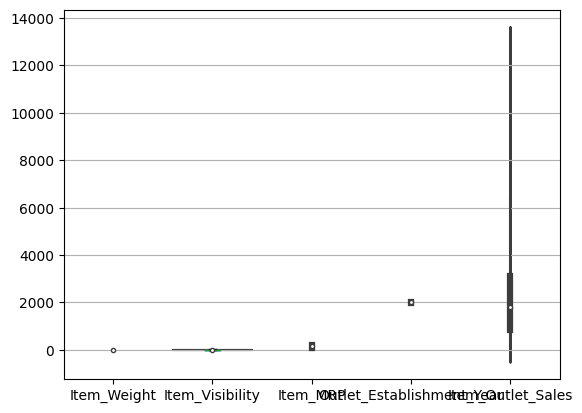

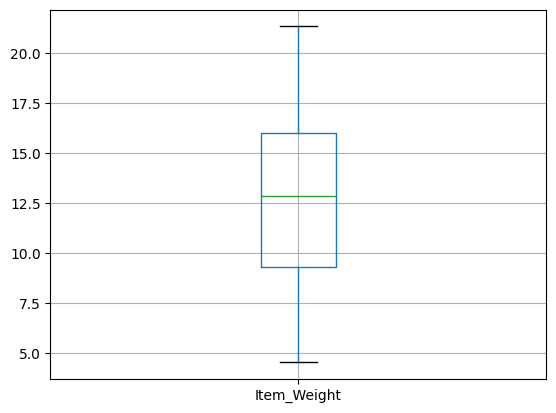

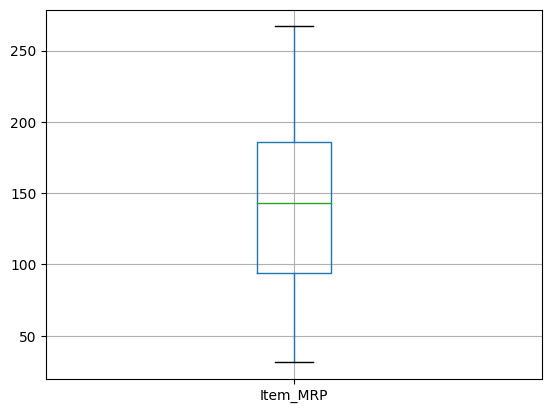

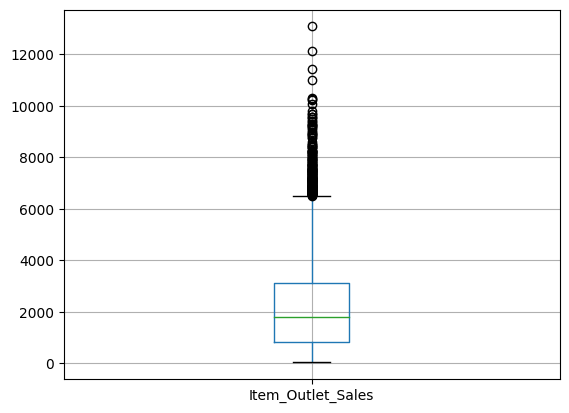

In [14]:
#Univariate Analysis
dataset.boxplot(column=['Item_Weight'])
sns.violinplot(column=['Item_MRP'],data=dataset)
plt.show()

dataset.boxplot(column=['Item_Weight'])
plt.show()
dataset.boxplot(column=['Item_MRP'])
plt.show()
dataset.boxplot(column=['Item_Outlet_Sales'])
plt.show()


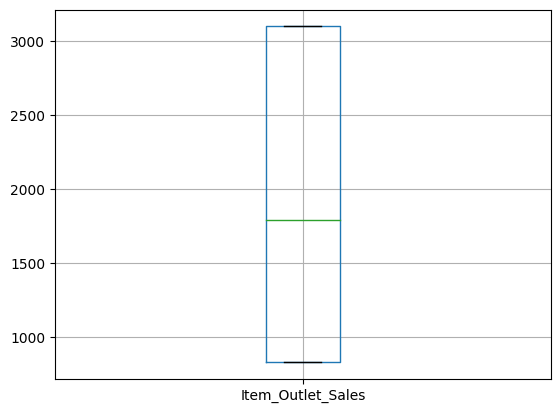

In [15]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    lower_range=q1-(1.5 * 0.25)
    upper_range=q3-(1.5 *0.75)
    return lower_range,upper_range
lowsales,uppsales=remove_outlier(concting['Item_Outlet_Sales'])
dataset['Item_Outlet_Sales']=np.where(dataset['Item_Outlet_Sales']>uppsales,uppsales,dataset['Item_Outlet_Sales'])
dataset['Item_Outlet_Sales']=np.where(dataset['Item_Outlet_Sales']<lowsales,lowsales,dataset['Item_Outlet_Sales'])
dataset.boxplot(column=['Item_Outlet_Sales'])
plt.show()

<ipython-input-16-58207270d798>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covv=dataset.cov()
<ipython-input-16-58207270d798>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()
<ipython-input-16-58207270d798>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)



                            Item_Weight  Item_Visibility      Item_MRP  \
Item_Weight                  17.859333        -0.002634      6.527977   
Item_Visibility              -0.002634         0.002664     -0.004252   
Item_MRP                      6.527977        -0.004252   3881.286939   
Outlet_Establishment_Year    -0.293546        -0.032377      2.611678   
Item_Outlet_Sales            64.988673        -6.503051  32197.885632   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.293546          64.988673  
Item_Visibility                            -0.032377          -6.503051  
Item_MRP                                    2.611678       32197.885632  
Outlet_Establishment_Year                  70.079763         -26.740400  
Item_Outlet_Sales                         -26.740400      851912.298789  

                            Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000      

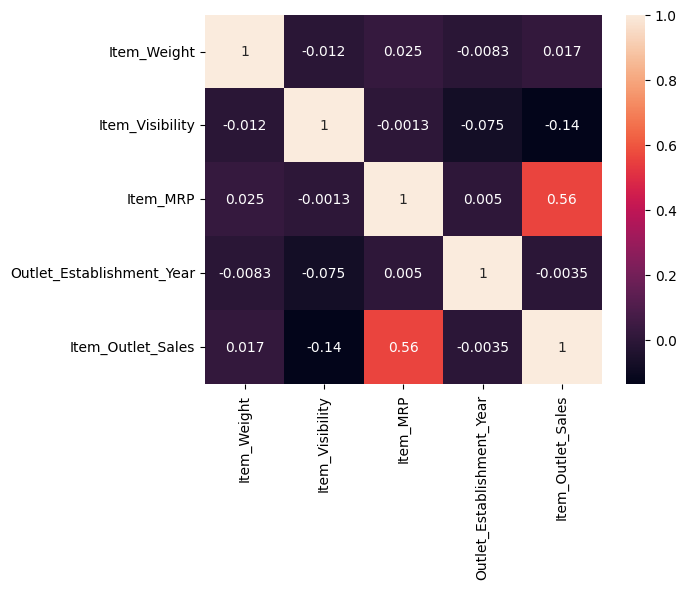

In [16]:
#Bivariate Analysis
covv=dataset.cov()
print("\n",covv)

corr=dataset.corr()
print("\n",corr)

sns.heatmap(dataset.corr(),annot=True)
plt.show()

Feature Engineering

In [17]:
dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2883
LF          316
reg         116
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
dataset['Item_Fat_Content']= dataset['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2999
Name: Item_Fat_Content, dtype: int64

Encoding Categorical Variables and One Hot Encoding

In [19]:
from sklearn import preprocessing
print(dataset.head())
O_TYPE = pd.get_dummies(dataset['Outlet_Type'])
O_LOCATION_T = pd.get_dummies(dataset['Outlet_Location_Type'])
O_SIZE = pd.get_dummies(dataset['Outlet_Size'])
I_FAT = pd.get_dummies(dataset['Item_Fat_Content'])

NW_dataset = pd.concat([dataset,O_TYPE,O_LOCATION_T,O_SIZE,I_FAT],axis=1)
print(NW_dataset)

label = NW_dataset['Item_Outlet_Sales']

train = NW_dataset.drop(columns=['Item_Identifier','Item_Weight','Outlet_Type','Outlet_Identifier','Item_Fat_Content','Item_Outlet_Sales','Outlet_Location_Type','Item_Type','Outlet_Size','Outlet_Establishment_Year'])
print(train)
data_types_dict = {'Item_Identifier': int,'Item_Fat_Content': int,'Item_Type': int,'Outlet_Identifier': int
    ,'Outlet_Size': int,'Outlet_Location_Type': int,'Outlet_Type': int}

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                     1999.0      Medium               Tier 1   
1                     2009.0      Medium               Tier 3   
2                     1999.0      Medium               Tier

Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
dataset['Item_Identifier'] = encoder.fit_transform(dataset['Item_Identifier'])
dataset['Item_Fat_Content'] = encoder.fit_transform(dataset['Item_Fat_Content'])
dataset['Item_Type'] = encoder.fit_transform(dataset['Item_Type'])
dataset['Outlet_Identifier'] = encoder.fit_transform(dataset['Outlet_Identifier'])
dataset['Outlet_Size'] = encoder.fit_transform(dataset['Outlet_Size'])
dataset['Outlet_Location_Type'] = encoder.fit_transform(dataset['Outlet_Location_Type'])
dataset['Outlet_Type'] = encoder.fit_transform(dataset['Outlet_Type'])

In [22]:
X = dataset.drop(columns='Item_Outlet_Sales', axis=1)
Y = dataset['Item_Outlet_Sales']
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 661       17.500                 0         0.016760   
3                1120       19.200                 1         0.000000   
4                1296        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              896        8.380                 1         0.046982   
8520             1356       10.600                 0         0.035186   
8521              680        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training:

Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [26]:
regressor = LinearRegression()

In [27]:
from sklearn.impute import SimpleImputer

# create an imputer object
imputer = SimpleImputer(strategy='mean')

# fit the imputer on the training data
imputer.fit(X_train)

# transform the training and test data using the imputer
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# concatenate X and Y into a single dataframe
data = pd.concat([X, Y], axis=1)

# drop rows with NaN values in both X and Y
data.dropna(inplace=True)

# separate X and Y
X = data.drop('Item_Outlet_Sales', axis=1)
Y = data['Item_Outlet_Sales']

# split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# create a linear regression model
model = LinearRegression()

# fit the model on the training data
model.fit(X_train, Y_train)

# make predictions on the training data
training_data_prediction = model.predict(X_train)

# calculate R-squared and MSE on training set
train_r2 = r2_score(Y_train, training_data_prediction)
train_mse = mean_squared_error(Y_train, training_data_prediction)
print("Training R-squared:", train_r2)
print("Training MSE:", train_mse)

# make predictions on the test data


Training R-squared: 0.4830130910036917
Training MSE: 439574.1486588246


Regularized Linear Regression

Lasso

In [29]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Create and train the Lasso regression model
regressor = Lasso(alpha=0.1)
regressor.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [30]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [31]:
r2_train = r2_score(Y_train, training_data_prediction)

In [32]:
print('R Squared value = ', r2_train)

R Squared value =  0.4830081570071513


In [33]:
test_data_prediction = regressor.predict(X_test)

In [34]:
r2_test = r2_score(Y_test, test_data_prediction)

In [35]:
print('R Squared value = ', r2_test)

R Squared value =  0.4868537838972511


Ridge

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Create and train the Lasso regression model
regressor = Ridge(alpha=0.1)
regressor.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [37]:
training_data_prediction = regressor.predict(X_train)

In [38]:
r2_train = r2_score(Y_train, training_data_prediction)

In [39]:
print('R Squared value = ', r2_train)

R Squared value =  0.48301301762718707


In [40]:
test_data_prediction = regressor.predict(X_test)

In [41]:
r2_test = r2_score(Y_test, test_data_prediction)

In [42]:
print('R Squared value = ', r2_test)

R Squared value =  0.48696309311622954


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [44]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [45]:
r2_train =r2_score(Y_train, training_data_prediction)

In [46]:
print('R Squared value = ', r2_train)

R Squared value =  0.9398925218711102


In [47]:
test_data_prediction = regressor.predict(X_test)

In [48]:
r2_test = r2_score(Y_test, test_data_prediction)

In [49]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.5677667602601324


In [50]:
from xgboost import XGBRegressor
regressor = XGBRegressor()


In [51]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
training_data_prediction = regressor.predict(X_train)

In [53]:
r2_train = r2_score(Y_train, training_data_prediction)

In [54]:
print('R Squared value = ', r2_train)

R Squared value =  0.8642571859836488


In [55]:
test_data_prediction = regressor.predict(X_test)

In [56]:
r2_test = r2_score(Y_test, test_data_prediction)

In [57]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.5520848184607376


**SUMMARY:** The error of the model is  very high, also the score is too low, both metrics can be improved, either, improving the data or star playing with some hyperparameters to improve the model. RandomForestRegressor gave good accarcy when compared to other model.